In [27]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 5

## Reading the dataset files

In [28]:
train = pd.read_csv('dataset/yds_train2018.csv')
test = pd.read_csv('dataset/yds_test2018.csv')
promo_expense = pd.read_csv('dataset/promotional_expense.csv')
holidays = pd.read_excel('dataset/holidays.xlsx')

In [29]:
test.head()

,S_No,Year,Month,Product_ID,Country,Sales
0,79073,2016,4,1,Argentina,NaN
1,79074,2016,5,1,Argentina,NaN
2,79075,2016,6,1,Argentina,NaN
3,79076,2016,7,1,Argentina,NaN
4,79077,2016,8,1,Argentina,NaN


In [30]:
promo_expense.head()

,Year,Month,Country,Product_Type,Expense_Price
0,2013,1,Argentina,1,14749.307
1,2013,1,Argentina,2,1329.374
2,2013,1,Belgium,2,249.590
3,2013,1,Columbia,1,1893.122
4,2013,1,Columbia,2,1436.726


In [31]:
holidays.head()

,Date,Country,Holiday
0,"2014, 1, 1",Denmark,Nytårsdag
1,"2014, 4, 17",Denmark,Skærtorsdag
2,"2014, 4, 18",Denmark,Langfredag
3,"2014, 4, 20",Denmark,Påskedag
4,"2014, 4, 21",Denmark,Anden påskedag


### Checking the NULL values

In [32]:
train.isnull().sum()

S_No           0
Year           0
Month          0
Week           0
Merchant_ID    0
Product_ID     0
Country        0
Sales          0
dtype: int64

In [323]:
test.isnull().sum()

Year            0
Month           0
Product_ID      0
Country         0
Sales         105
dtype: int64

In [34]:
promo_expense.isnull().sum()

Year             0
Month            0
Country          0
Product_Type     0
Expense_Price    0
dtype: int64

In [35]:
holidays.isnull().sum()

Date       0
Country    0
Holiday    0
dtype: int64

In [36]:
train.dtypes

S_No             int64
Year             int64
Month            int64
Week             int64
Merchant_ID     object
Product_ID       int64
Country         object
Sales          float64
dtype: object

## To Estimate sMape

In [242]:
def sMAPE(forcasted, actual):
    return abs(forcasted-actual)/(0.5*(abs(forcasted)+abs(actual)))

In [41]:
data_monthly = train.groupby(['S_No','Year', 'Month', 'Product_ID', 'Country']).agg({'Sales':sum})

In [42]:
data_monthly.reset_index(level=[ 'Year', 'Month', 'Product_ID', 'Country'], inplace =True)

In [43]:
data_monthly.head()

,Year,Month,Product_ID,Country,Sales
S_No,,,,,
1,2013,1,1,Argentina,157500.0
2,2013,1,1,Argentina,39375.0
3,2013,1,1,Argentina,15750.0
4,2013,1,1,Argentina,47250.0
5,2013,1,1,Argentina,283500.0


In [44]:
uniqCountry = data_monthly['Country'].unique()

In [45]:
def monthsConvert(x):
    if int(x) in range(1,10):
        return "0"+x
    else:
        return x

In [46]:
ts = {}
for country in uniqCountry:
    data_month_country = data_monthly[data_monthly['Country']==country]
    uniqProd = data_month_country['Product_ID'].unique()
    for product in uniqProd:
        data_month_filtered = data_month_country[data_month_country['Product_ID']==product]
        data_month_filtered['time'] = data_month_filtered['Year'].astype(str) +"-" + data_month_filtered['Month'].astype(str).apply(monthsConvert)
        data_month_filtered['time'].apply(lambda dates: pd.datetime.strptime(dates, '%Y-%m'))
        datagroupby = data_month_filtered.groupby(['time']).agg({'Sales':sum})
        datagroupby.index= pd.to_datetime(datagroupby.index)
        '''promo_expense_filtered = promo_expense[(promo_expense['Product_Type']==product)&(promo_expense['Country']==country)]
        promo_expense_filtered['time'] = promo_expense_filtered['Year'].astype(str) + promo_expense_filtered['Month'].astype(str).apply(monthsConvert)
        promogroupby = promo_expense_filtered.groupby(['time']).agg({'Expense_Price':sum})'''
        #print(datagroupby.index)
        ts[(country,product)] = datagroupby['Sales']

C:\Users\NITIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [325]:
for key,value in ts:
    print((key,value),end=" ")

('Argentina', 1) ('Argentina', 2) ('Argentina', 3) ('Belgium', 2) ('Columbia', 1) ('Columbia', 2) ('Columbia', 3) ('Denmark', 2) ('England', 5) ('England', 4) ('Finland', 4) 

In [333]:
#ts[('Argentina', 1) ].tail()

time
2015-11-01    14762475.0
2015-12-01    15003450.0
2016-01-01    14740425.0
2016-02-01    11214000.0
2016-03-01    15016050.0
Name: Sales, dtype: float64

In [348]:
#test[(test['Country']== 'Argentina') & (test['Product_ID']==1)]
test[(test['Country']== 'Argentina') & (test['Product_ID']==2)]

,Year,Month,Product_ID,Country,Sales
S_No,,,,,
79085,2016,4,2,Argentina,NaN
79086,2016,5,2,Argentina,NaN
79087,2016,6,2,Argentina,NaN
79088,2016,7,2,Argentina,NaN
79089,2016,8,2,Argentina,NaN
79090,2016,9,2,Argentina,NaN
79091,2016,10,2,Argentina,NaN
79092,2016,11,2,Argentina,NaN
79093,2016,12,2,Argentina,NaN


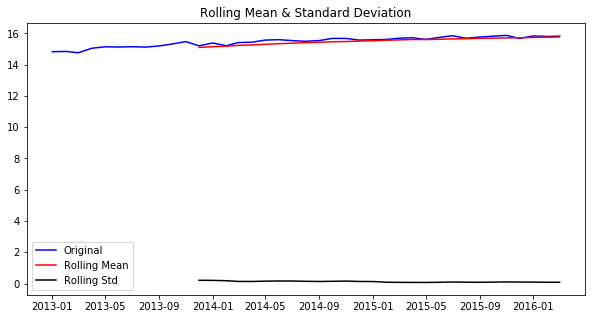

Results of Dickey-Fuller Test:
Test Statistic                 -3.103984
p-value                         0.026260
#Lags Used                      6.000000
Number of Observations Used    32.000000
Critical Value (1%)            -3.653520
Critical Value (5%)            -2.957219
Critical Value (10%)           -2.617588
dtype: float64


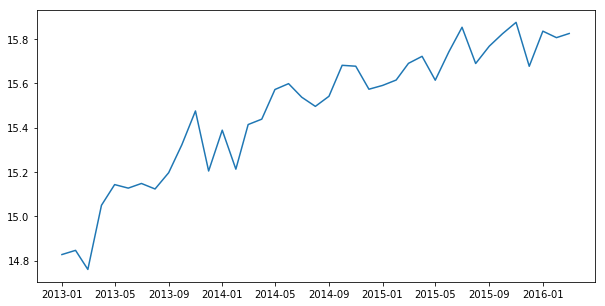

In [350]:
#test_stationary(ts[('Argentina', 1)])
#plt.plot(np.log(ts[('Argentina', 1)]))
test_stationary(np.log(ts[('Argentina', 2)]))
plt.plot(np.log(ts[('Argentina', 2)]))

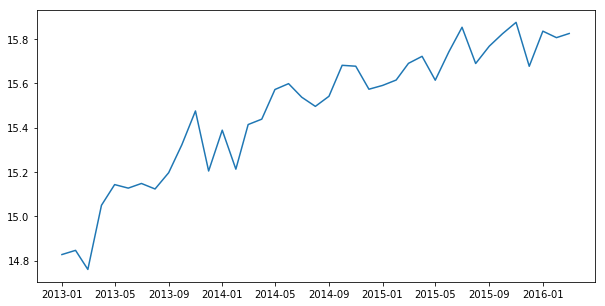

In [351]:
#ts_log = np.power((ts[('Argentina', 1)]),1/2)
#plt.plot(ts_log)
ts_log = np.log((ts[('Argentina', 2)]))
plt.plot(ts_log)

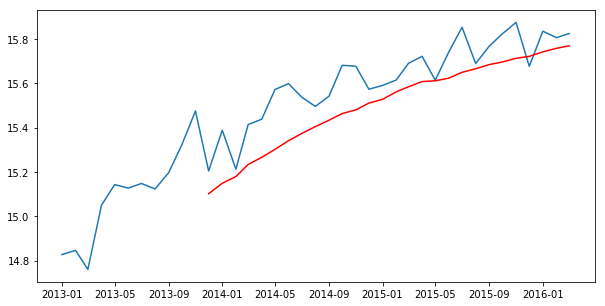

In [356]:
moving_avg = ts_log.rolling(window = 12).mean()
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

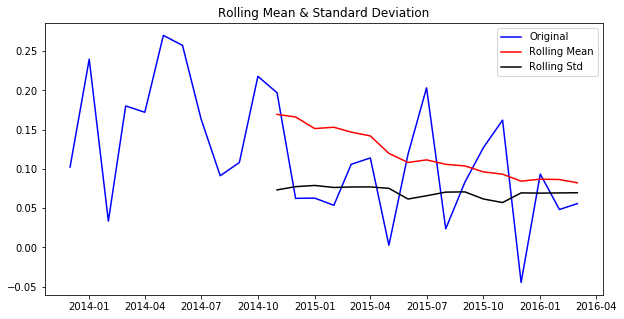

Results of Dickey-Fuller Test:
Test Statistic                 -4.132449
p-value                         0.000856
#Lags Used                      0.000000
Number of Observations Used    27.000000
Critical Value (1%)            -3.699608
Critical Value (5%)            -2.976430
Critical Value (10%)           -2.627601
dtype: float64


In [353]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationary(ts_log_moving_avg_diff)

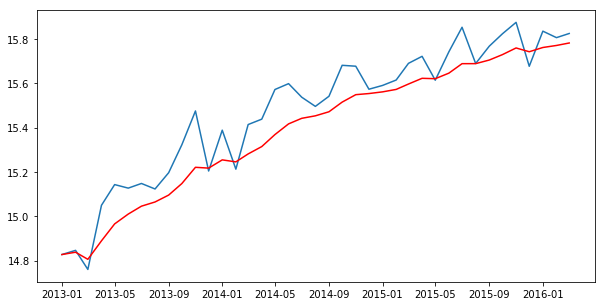

In [354]:
expwighted_avg = ts_log.ewm(halflife=3).mean()
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')

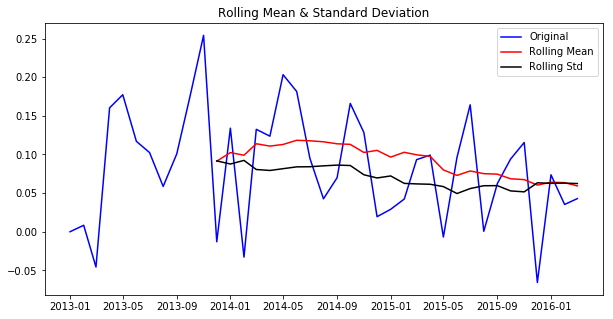

Results of Dickey-Fuller Test:
Test Statistic                 -5.568249
p-value                         0.000001
#Lags Used                      0.000000
Number of Observations Used    38.000000
Critical Value (1%)            -3.615509
Critical Value (5%)            -2.941262
Critical Value (10%)           -2.609200
dtype: float64


In [355]:
ts_log_ewma_diff = ts_log - expwighted_avg
test_stationary(ts_log_ewma_diff)

In [283]:
ts_log_diff = ts_log - ts_log.shift()
#plt.plot(ts_log_diff)

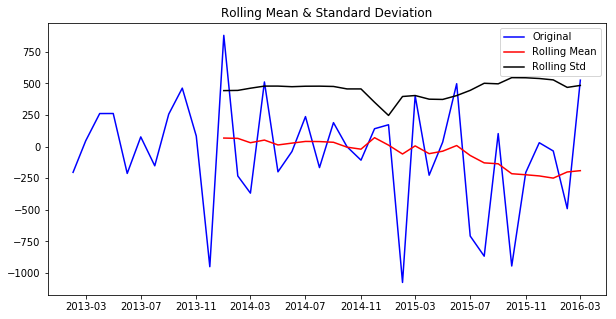

Results of Dickey-Fuller Test:
Test Statistic                 -2.756639
p-value                         0.064739
#Lags Used                      2.000000
Number of Observations Used    35.000000
Critical Value (1%)            -3.632743
Critical Value (5%)            -2.948510
Critical Value (10%)           -2.613017
dtype: float64


In [284]:
ts_log_diff.dropna(inplace=True)
test_stationary(ts_log_diff)

In [285]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

In [286]:
lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

Text(0.5,1,'Autocorrelation Function')

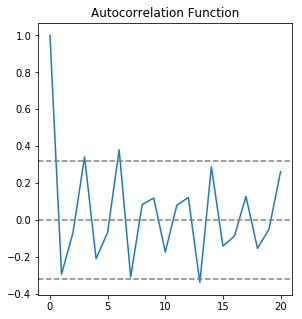

In [287]:
#Plot ACF: 
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
#plt.axvline(x=0.5,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')


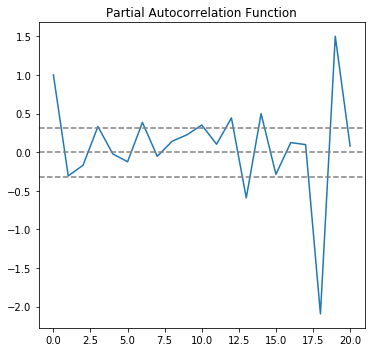

In [288]:
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
#plt.axvline(x=0.5,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [289]:
from statsmodels.tsa.arima_model import ARIMA

### AR Model

C:\Users\NITIN\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\NITIN\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5,1,'RSS: 1.3551')

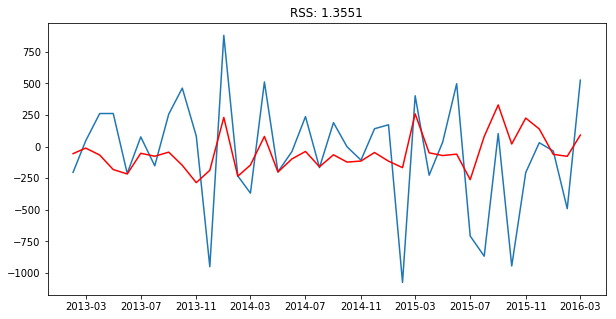

In [302]:
model = ARIMA(ts_log, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
result = sum(sMAPE(results_AR.fittedvalues,ts_log_diff))/len(ts_log_diff)
plt.title('RSS: %.4f'% result)

## MA Model

C:\Users\NITIN\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\NITIN\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5,1,'RSS: 1.3551')

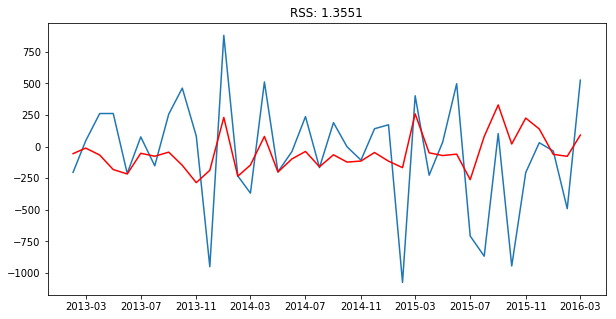

In [305]:
model = ARIMA(ts_log, order=(2, 1, 0))  
results_MA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
result = sum(sMAPE(results_MA.fittedvalues,ts_log_diff))/len(ts_log_diff)
plt.title('RSS: %.4f'% result)

C:\Users\NITIN\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\NITIN\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5,1,'RSS: 1.3551')

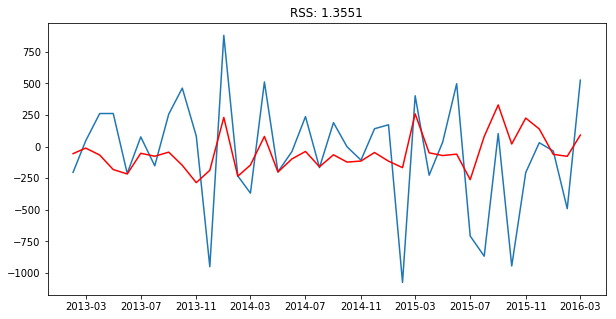

In [306]:
model = ARIMA(ts_log, order=(2,1,0))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
result = sum(sMAPE(results_ARIMA.fittedvalues,ts_log_diff))/len(ts_log_diff)
plt.title('RSS: %.4f'% result)

In [307]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

time
2013-02-01    -55.143520
2013-03-01    -11.127103
2013-04-01    -66.222937
2013-05-01   -181.041804
2013-06-01   -216.022699
dtype: float64


In [308]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

time
2013-02-01    -55.143520
2013-03-01    -66.270623
2013-04-01   -132.493560
2013-05-01   -313.535364
2013-06-01   -529.558063
dtype: float64


In [309]:
predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

C:\Users\NITIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


time
2013-01-01    5860.548183
2013-02-01    5805.404662
2013-03-01    5794.277559
2013-04-01    5728.054623
2013-05-01    5547.012818
dtype: float64

Text(0.5,1,'RSS: 0.5798')

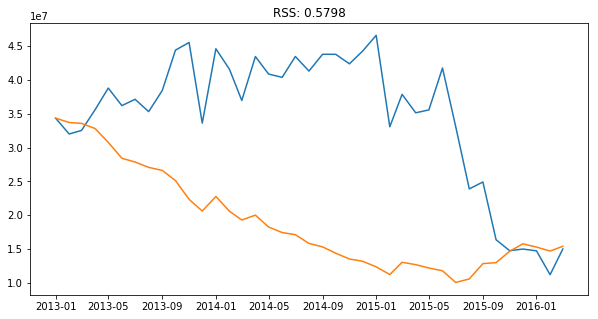

In [310]:
predictions_ARIMA = np.power(predictions_ARIMA_log,2)
plt.plot(ts[('Argentina', 1)])
plt.plot(predictions_ARIMA)
#print(predictions_ARIMA)
result = sum(sMAPE(predictions_ARIMA,ts[('Argentina', 1)]))/len(ts[('Argentina', 1)])
plt.title('RSS: %.4f'% result)

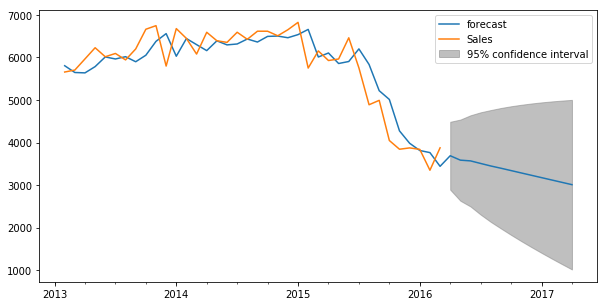

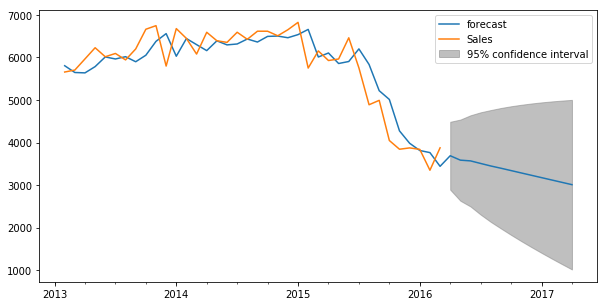

In [332]:
results_ARIMA.plot_predict(1,51)

In [346]:
x= results_ARIMA.forecast(steps=12)
test.Sales.loc[79073:79084] = np.power(x[1],2)

C:\Users\NITIN\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [347]:
test[(test['Country']== 'Argentina') & (test['Product_ID']==1)]['Sales']

S_No
79073    165905.250943
79074    237021.031605
79075    299263.018691
79076    376615.331492
79077    450061.425390
79078    522337.618947
79079    595637.168128
79080    668771.644895
79081    741797.533403
79082    814887.528546
79083    887972.914398
79084    961049.541377
Name: Sales, dtype: float64

## Finding the Test Datapoints

In [311]:
test.set_index('S_No',inplace=True)

KeyError: 'S_No'

In [312]:
test.head()

,Year,Month,Product_ID,Country,Sales
S_No,,,,,
79073,2016,4,1,Argentina,NaN
79074,2016,5,1,Argentina,NaN
79075,2016,6,1,Argentina,NaN
79076,2016,7,1,Argentina,NaN
79077,2016,8,1,Argentina,NaN


In [313]:
ts = {}
for country in uniqCountry:
    data_month_country = data_monthly[data_monthly['Country']==country]
    uniqProd = data_month_country['Product_ID'].unique()
    for product in uniqProd:
        data_month_filtered = data_month_country[data_month_country['Product_ID']==product]
        data_month_filtered['time'] = data_month_filtered['Year'].astype(str) +"-" + data_month_filtered['Month'].astype(str).apply(monthsConvert)
        data_month_filtered['time'].apply(lambda dates: pd.datetime.strptime(dates, '%Y-%m'))
        datagroupby = data_month_filtered.groupby(['time']).agg({'Sales':sum})
        datagroupby.index= pd.to_datetime(datagroupby.index)
        '''promo_expense_filtered = promo_expense[(promo_expense['Product_Type']==product)&(promo_expense['Country']==country)]
        promo_expense_filtered['time'] = promo_expense_filtered['Year'].astype(str) + promo_expense_filtered['Month'].astype(str).apply(monthsConvert)
        promogroupby = promo_expense_filtered.groupby(['time']).agg({'Expense_Price':sum})'''
        #print(datagroupby.index)
        ts[(country,product)] = datagroupby['Sales']

C:\Users\NITIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [92]:
from statsmodels.tsa.stattools import adfuller
def test_stationary(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window = 12).mean()
    rolstd = timeseries.rolling(window = 12).std()
    #print(rolmean,rolstd)
    
    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

In [375]:
def test_moving_average(timeseries):
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()
    plt.plot(timeseries)
    plt.plot(movingAverage,color='red')
    plt.show()